# Import Library

In [1093]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn import metrics

In [1094]:
df = pd.read_csv('dataset/Student_Marks.csv')

In [1095]:
df.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [1096]:
df = df[['time_study','Marks']]
df

,time_study,Marks
0,4.508,19.202
1,0.096,7.734
2,3.133,13.811
3,7.909,53.018
4,7.811,55.299
...,...,...
95,3.561,19.128
96,0.301,5.609
97,7.163,41.444
98,0.309,12.027


# Cek Outliers

time_study       Axes(0.125,0.11;0.352273x0.77)
Marks         Axes(0.547727,0.11;0.352273x0.77)
dtype: object

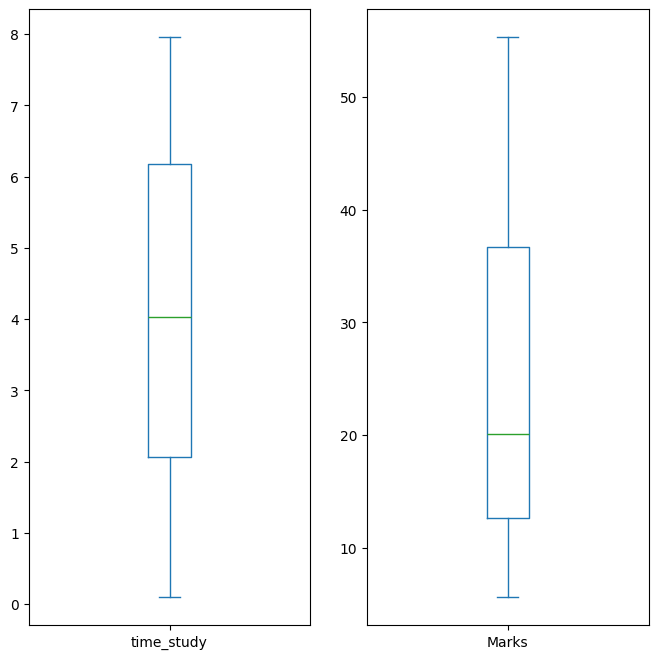

In [1097]:
df.plot(kind='box', subplots=True, figsize=(8,8))

# Splitting Dataset

In [1098]:
train, test = train_test_split(df, test_size = 0.2, random_state = 42)

train = train.sort_values('time_study')
test = test.sort_values('time_study')

x_train, x_test = train[['time_study']], test[['time_study']]
y_train, y_test = train['Marks'], test['Marks']

# Feature Scalling

In [1099]:
scale = StandardScaler().fit(x_train)
x_train = scale.fit_transform(x_train)
x_test = scale.fit_transform(x_test)

# Training

In [1100]:
svr_linear = SVR(kernel='linear', C=100, epsilon=8.5)
svr_poly = SVR(kernel='poly', degree=3, C=100, epsilon=8.5)
svr_linear.fit(x_train, y_train)
svr_poly.fit(x_train, y_train)

SVR(C=100, epsilon=8.5, kernel='poly')

# Visualization

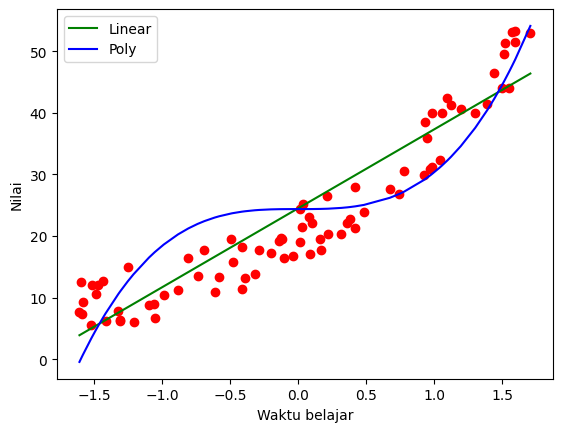

In [1116]:
plt.scatter(x_train, y_train,color='red')
plt.plot(x_train, svr_linear.predict(x_train), color='green', label='Linear')
plt.plot(x_train, svr_poly.predict(x_train), color='blue', label='Poly')
plt.legend()
plt.xlabel('Waktu belajar')
plt.ylabel('Nilai')
plt.show()

In [1117]:
pred_linear = svr_linear.predict(x_test)
pred_poly = svr_poly.predict(x_test)

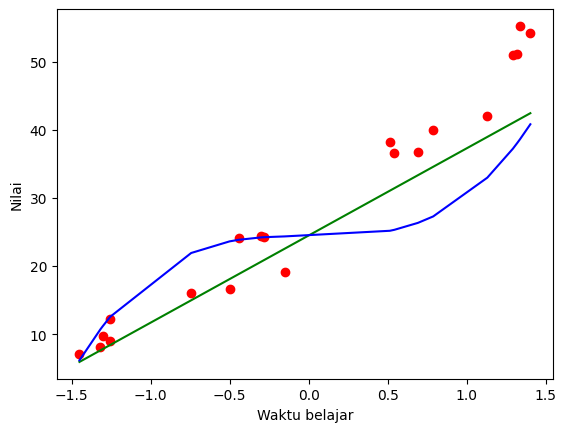

In [1121]:
plt.scatter(x_test, y_test,color='red')
plt.plot(x_test, pred_linear, color='green')
plt.plot(x_test, pred_poly, color='blue')
plt.xlabel('Waktu belajar')
plt.ylabel('Nilai')
plt.show()

# Hasil Prediksi SVR linear

### MAE

In [1119]:
round(metrics.mean_absolute_error(y_test, pred_linear),2)

4.79

### R^2

In [1120]:
round(metrics.r2_score(y_test, pred_linear),2)

0.86

# Hasil Prediksi SVR Poly

### MAE

In [1122]:
round(metrics.mean_absolute_error(y_test, pred_poly),2)

7.03

### R^2

In [1124]:
round(metrics.r2_score(y_test, pred_poly),2)

0.7